<p align="center"><span style="font-size:2em;">Università di Bologna</span></p>
<p align="center">
  <img src="unibo_logo.png" alt="Università di Bologna Logo" width="180"/>
</p>
<p align="center"><span style="font-size:1.3em;">School of Engineering</span></p>
<p align="center"><span style="font-size:1.1em;">Master Degree in Automation Engineering</span></p>
<p align="center"><span style="font-size:1.1em;">Optimization and Machine Learning</span></p>
<p align="center"><span style="font-size:1.2em;"><strong>Sport Car Price Project</strong></span></p>

<div style="display: flex; justify-content: space-between;">
  <span><strong>Professor:</strong> Andrea Lodi</span>
  <span><strong>Students:</strong> Vittorio Caputo, Federico Collepardo</span>
</div>

<p align="center"><strong>Academic Year:</strong> 2024/25</strong></p>

# Data Exploration and Preprocessing

The code cell below imports all the necessary libraries and modules required for data analysis, preprocessing, and machine learning. It includes:

- Data manipulation library: `pandas`
- Custom functions from the local `Functions` module
- Scikit-learn modules for model selection, evaluation metrics, preprocessing, and regression models
- Popular machine learning libraries: `xgboost` and `catboost`
- Tools for data transformation: `PowerTransformer`

These imports provide the essential tools for the subsequent steps in the notebook, including data cleaning, feature engineering, model training, and evaluation.

In [1]:
# Import libraries
import pandas as pd
from Functions import *  
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor, HistGradientBoostingRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PowerTransformer
from sklearn.base import clone

This section loads the dataset from the file `Sport_car_price.csv` into a pandas DataFrame. It then provides an initial overview of the data by displaying:

- The shape of the dataset (number of rows and columns)
- The data types of each column
- The first few rows of the dataset for a quick inspection

These steps help to understand the structure and contents of the data before proceeding with further analysis and preprocessing.

In [2]:
# Load the dataset
df = pd.read_csv("Sport_car_price.csv")

# Display the shape of the dataset
print(f"Dataset shape: {df.shape[0]} rows, {df.shape[1]} columns")

# Type of each column
print("\nData types of each column:")   
print(df.dtypes)

# Display the first few rows of the dataset
print("\nFirst few rows of the dataset:")
df.head()

Dataset shape: 1007 rows, 8 columns

Data types of each column:
Car Make                   object
Car Model                  object
Year                        int64
Engine Size (L)            object
Horsepower                 object
Torque (lb-ft)             object
0-60 MPH Time (seconds)    object
Price (in USD)             object
dtype: object

First few rows of the dataset:


,Car Make,Car Model,Year,Engine Size (L),Horsepower,Torque (lb-ft),0-60 MPH Time (seconds),Price (in USD)
0,Porsche,911,2022,3,379,331,4,"101,200"
1,Lamborghini,Huracan,2021,5.2,630,443,2.8,"274,390"
2,Ferrari,488 GTB,2022,3.9,661,561,3,"333,750"
3,Audi,R8,2022,5.2,562,406,3.2,"142,700"
4,McLaren,720S,2021,4,710,568,2.7,"298,000"


This section examines the unique values in the 'Engine Size (L)' and 'Torque (lb-ft)' columns to identify non-numeric entries and placeholders (such as 'Electric', 'Hybrid', '-', or '0'). These values indicate either electric/hybrid vehicles (which do not have a traditional engine size in liters) or missing/invalid data. 

To prepare for cleaning, a copy of the original DataFrame is created. The `clean_engine_size` function is then applied to the 'Engine Size (L)' column to convert placeholders values to a consistent format (e.g., replacing non-numeric entries and '0' with NaN or extracting numeric values from strings that indicate both the hybrid type and the engine size in liters for hybrid vehicles). The unique values in the cleaned column are displayed to verify the cleaning process. The cleaning of the 'Torque (lb-ft)' column will be done in the next section together with formatting correction of other columns.

In [3]:
# Display unique values in Engine Sizes (L) and Torque (lb-ft) columns
print("Unique Engine Sizes (L) before cleaning:")
print(df['Engine Size (L)'].unique(),'\n')
print("Unique Torque (lb-ft) before cleaning:")
print(df['Torque (lb-ft)'].unique(),'\n')

# Create a copy of the DataFrame to avoid modifying the original data
df2 = df.copy()

# Apply the cleaning function to the 'Engine Size (L)' column
df2['Engine Size (L)'] = df2['Engine Size (L)'].apply(clean_engine_size)

#Display unique values in the cleaned 'Engine Size (L)' column
print("Unique Engine Sizes (L) after cleaning:")
print(df2['Engine Size (L)'].unique(),'\n') 

Unique Engine Sizes (L) before cleaning:
['3' '5.2' '3.9' '4' '4.4' '6.2' '3.8' '8' '5' '3.5' '4.7' '2' '2.9' '6'
 'Electric' '6.5' '3.7' 'Electric Motor' '2.5' '1.5 + Electric' '6.8'
 '8.4' nan '6.6' '7' '1.7' '3.3' '-' '6.7' '1.8' 'Electric (tri-motor)'
 '5.5' 'Electric (93 kWh)' 'Electric (100 kWh)' 'Hybrid (4.0)' '4.6' '3.6'
 '1.5' 'Hybrid' '5.7' '2.0 (Electric)' '4.0 (Hybrid)' '0' '6.4' '6.3'
 '2.3'] 

Unique Torque (lb-ft) before cleaning:
['331' '443' '561' '406' '568' '553' '494' '465' '625' '481' '516' '1180'
 '656' '295' '1015' '398' '317' '384' '280' '243' '664' '531' '468' '737'
 '738' '1696' '309' '590' '479' '650' '550' '276' '626' '369' '420' '627'
 '455' '505' '560' '457' '707' '270' '354' '476' '339' '1106' '151' '605'
 '368' '723' '642' '509' '604' '507' '513' '600' '440' '1050' '708' '774'
 '254' '663' '332' '530' '470' '258' '290' '413' '1732' '376' '-'
 '10,000+' '236' '0' '472' '1254' '848' '1300' '442' '641' '498' '350' nan
 '944' '268' '184' '400' '263' '7,376' 

This section identifies numeric columns that may contain formatting characters or non-numeric values (such as dashes, commas, plus/less-than signs, or placeholders). The `clean_non_numeric_chars` function is applied to standardize these columns by removing unwanted characters and converting common placeholders (like `'-'`, `''`, `'0'`, or `'NaN'`) to proper missing values (`NaN`). This ensures missing or invalid data is handled consistently for further analysis.

In [4]:
# List of columns to clean (numeric columns that might contain formatting characters)
columns_to_clean = ['Year', 'Engine Size (L)', 'Horsepower', 'Torque (lb-ft)', '0-60 MPH Time (seconds)', 'Price (in USD)']

# Apply the cleaning function to the DataFrame and set show=True if you want to see rows before cleaning and after cleaning
clean_non_numeric_chars(df2, columns_to_clean, show=True)


Processing column: Year
Nothing to clean in column 'Year'

Processing column: Engine Size (L)
Nothing to clean in column 'Engine Size (L)'

Processing column: Horsepower
Before cleaning 'Horsepower', rows with unwanted characters {'+', ','}:


,Car Make,Car Model,Year,Engine Size (L),Horsepower,Torque (lb-ft),0-60 MPH Time (seconds),Price (in USD)
99,Tesla,Roadster,2022,NaN,1000+,737,1.9,"200,000"
335,Tesla,Roadster,2022,NaN,1000+,-,1.9,"200,000"
354,Tesla,Roadster,2022,NaN,1000+,"10,000+",1.9,"200,000"
364,Tesla,Roadster,2023,NaN,"1,000+",737,< 1.9,"200,000"
389,Tesla,Roadster,2022,NaN,10000+,0,1.9,"200,000"
885,Tesla,Roadster,2022,NaN,"10,000","7,376",1.9,"200,000"
898,Bugatti,Chiron,2021,8,"1,500","1,180",2.4,"3,000,000"
916,Tesla,Roadster,2022,NaN,"10,000+",NaN,1.9,"200,000"
965,Tesla,Model S Plaid,2022,NaN,"1,020","1,050",1.9,"141,190"


Cleaned 'Horsepower': removed characters {'+', ','}
After cleaning:


,Car Make,Car Model,Year,Engine Size (L),Horsepower,Torque (lb-ft),0-60 MPH Time (seconds),Price (in USD)
99,Tesla,Roadster,2022,NaN,1000,737,1.9,"200,000"
335,Tesla,Roadster,2022,NaN,1000,-,1.9,"200,000"
354,Tesla,Roadster,2022,NaN,1000,"10,000+",1.9,"200,000"
364,Tesla,Roadster,2023,NaN,1000,737,< 1.9,"200,000"
389,Tesla,Roadster,2022,NaN,10000,0,1.9,"200,000"
885,Tesla,Roadster,2022,NaN,10000,"7,376",1.9,"200,000"
898,Bugatti,Chiron,2021,8,1500,"1,180",2.4,"3,000,000"
916,Tesla,Roadster,2022,NaN,10000,NaN,1.9,"200,000"
965,Tesla,Model S Plaid,2022,NaN,1020,"1,050",1.9,"141,190"



Processing column: Torque (lb-ft)
Before cleaning 'Torque (lb-ft)', rows with unwanted characters {'-', '+', ','}:


,Car Make,Car Model,Year,Engine Size (L),Horsepower,Torque (lb-ft),0-60 MPH Time (seconds),Price (in USD)
335,Tesla,Roadster,2022,NaN,1000,-,1.9,"200,000"
354,Tesla,Roadster,2022,NaN,1000,"10,000+",1.9,"200,000"
885,Tesla,Roadster,2022,NaN,10000,"7,376",1.9,"200,000"
898,Bugatti,Chiron,2021,8,1500,"1,180",2.4,"3,000,000"
965,Tesla,Model S Plaid,2022,NaN,1020,"1,050",1.9,"141,190"


Cleaned 'Torque (lb-ft)': removed characters {'-', '+', ','}
After cleaning:


,Car Make,Car Model,Year,Engine Size (L),Horsepower,Torque (lb-ft),0-60 MPH Time (seconds),Price (in USD)
335,Tesla,Roadster,2022,NaN,1000,NaN,1.9,"200,000"
354,Tesla,Roadster,2022,NaN,1000,10000,1.9,"200,000"
885,Tesla,Roadster,2022,NaN,10000,7376,1.9,"200,000"
898,Bugatti,Chiron,2021,8,1500,1180,2.4,"3,000,000"
965,Tesla,Model S Plaid,2022,NaN,1020,1050,1.9,"141,190"



Processing column: 0-60 MPH Time (seconds)
Before cleaning '0-60 MPH Time (seconds)', rows with unwanted characters {'<', ' '}:


,Car Make,Car Model,Year,Engine Size (L),Horsepower,Torque (lb-ft),0-60 MPH Time (seconds),Price (in USD)
364,Tesla,Roadster,2023,NaN,1000,737,< 1.9,"200,000"


Cleaned '0-60 MPH Time (seconds)': removed characters {'<', ' '}
After cleaning:


,Car Make,Car Model,Year,Engine Size (L),Horsepower,Torque (lb-ft),0-60 MPH Time (seconds),Price (in USD)
364,Tesla,Roadster,2023,NaN,1000,737,1.9,"200,000"



Processing column: Price (in USD)
Before cleaning 'Price (in USD)', rows with unwanted characters {','}:


,Car Make,Car Model,Year,Engine Size (L),Horsepower,Torque (lb-ft),0-60 MPH Time (seconds),Price (in USD)
0,Porsche,911,2022,3,379,331,4,"101,200"
1,Lamborghini,Huracan,2021,5.2,630,443,2.8,"274,390"
2,Ferrari,488 GTB,2022,3.9,661,561,3,"333,750"
3,Audi,R8,2022,5.2,562,406,3.2,"142,700"
4,McLaren,720S,2021,4,710,568,2.7,"298,000"
...,...,...,...,...,...,...,...,...
1002,Koenigsegg,Jesko,2022,5,1280,1106,2.5,"3,000,000"
1003,Lotus,Evija,2021,NaN,1972,1254,2,"2,000,000"
1004,McLaren,Senna,2021,4,789,590,2.7,"1,000,000"
1005,Pagani,Huayra,2021,6,764,738,3,"2,600,000"


Cleaned 'Price (in USD)': removed characters {','}
After cleaning:


,Car Make,Car Model,Year,Engine Size (L),Horsepower,Torque (lb-ft),0-60 MPH Time (seconds),Price (in USD)
0,Porsche,911,2022,3,379,331,4,101200
1,Lamborghini,Huracan,2021,5.2,630,443,2.8,274390
2,Ferrari,488 GTB,2022,3.9,661,561,3,333750
3,Audi,R8,2022,5.2,562,406,3.2,142700
4,McLaren,720S,2021,4,710,568,2.7,298000
...,...,...,...,...,...,...,...,...
1002,Koenigsegg,Jesko,2022,5,1280,1106,2.5,3000000
1003,Lotus,Evija,2021,NaN,1972,1254,2,2000000
1004,McLaren,Senna,2021,4,789,590,2.7,1000000
1005,Pagani,Huayra,2021,6,764,738,3,2600000


This section performs an important **feature engineering** step by creating a new column, 'Engine Type', which classifies each car as 'Electric', 'Hybrid', or 'Combustion' using the `classify_engine` function and information from the original 'Engine Size (L)' column. This engineered feature helps to extract and represent key information about the vehicle's powertrain that is not directly available.

After creating the 'Engine Type' column, the code displays the unique engine types present in the dataset and filters the DataFrame to show only rows where the engine type is 'Electric' or 'Hybrid'.

This step also serves as a validation of the previous cleaning process: all electric cars have `NaN` in the 'Engine Size (L)' column (since they do not have a traditional engine size in liters), while all hybrid cars have a numeric value extracted during cleaning, except for one entry labeled only as 'Hybrid' in the original dataset. This confirms that the cleaning and feature engineering were performed correctly.

In [5]:
# Add 'Engine Type' column based on the original 'Engine Size (L)' column from df
df2['Engine Type'] = df['Engine Size (L)'].apply(classify_engine)

# Print all unique engine types found in the data
print("Unique engine types found in the dataset:")
print(df2['Engine Type'].unique(), '\n')

# Filter rows where Engine Type is Electric or Hybrid
filtered_df = df2[df2['Engine Type'].isin(['Electric', 'Hybrid'])]
print("Displaying some rows where 'Engine Type' is either 'Electric' or 'Hybrid':\n")
# Display some filtered rows
filtered_df.head(10) # Increase the number to see more rows if needed

Unique engine types found in the dataset:
['Combustion' 'Electric' 'Hybrid'] 

Displaying some rows where 'Engine Type' is either 'Electric' or 'Hybrid':



,Car Make,Car Model,Year,Engine Size (L),Horsepower,Torque (lb-ft),0-60 MPH Time (seconds),Price (in USD),Engine Type
26,Rimac,Nevera,2022,NaN,1914,1696,1.85,2400000,Electric
37,Porsche,Taycan 4S,2022,NaN,562,479,3.8,104000,Electric
42,BMW,i8,2020,1.5,369,420,4.2,148500,Hybrid
97,Rimac,Nevera,2022,NaN,1914,1696,1.95,2400000,Electric
99,Tesla,Roadster,2022,NaN,1000,737,1.9,200000,Electric
168,Rimac,C_Two,2022,NaN,1914,1696,1.9,2400000,Electric
171,Tesla,Model S Plaid,2021,NaN,1020,1050,1.98,131190,Electric
185,Porsche,Taycan,2021,NaN,750,774,2.6,185000,Electric
222,Porsche,Taycan Turbo S,2021,NaN,750,774,2.6,185000,Electric
247,Tesla,Model S Plaid,2022,NaN,1020,1050,1.9,131190,Electric


This section selects all columns to be converted into numeric (but they are in string format) from index 3 up to the last column (excluded) and applies the `convert_to_numeric` function to ensure these columns are properly converted to numeric data types. This step is crucial because many data analysis tools, visualizations, and machine learning algorithms require numeric input to function correctly. Finally, it prints the data types of all columns in the DataFrame to verify the conversion.

In [6]:
# Select all columns from index 3 to the last column excluded
cols = df2.columns[3:-1]

# Convert the selected columns to numeric
df2 = convert_to_numeric(df2, cols)

# Print the final data types of all columns in the DataFrame
print("\nFinal dtypes after conversion:")
print(df2.dtypes)


Final dtypes after conversion:
Car Make                    object
Car Model                   object
Year                         int64
Engine Size (L)            float64
Horsepower                   int64
Torque (lb-ft)             float64
0-60 MPH Time (seconds)    float64
Price (in USD)               int64
Engine Type                 object
dtype: object


After cleaning and converting the data, this step checks for and removes any duplicate rows in the DataFrame using the `remove_duplicates` function. Removing duplicates is important to ensure the dataset is accurate and that repeated entries do not bias the analysis or model training.

In [7]:
# Once the data is cleaned, we can check and remove duplicates
remove_duplicates(df2)

Number of duplicate rows: 293
Duplicates dropped. New shape: 714 rows, 9 columns


This section analyzes and handles missing values in the dataset. It first summarizes missing data, then drops rows with missing values in the 'Torque (lb-ft)' column since they are few. However, missing values in the 'Engine Size (L)' column are more complex: they represent a significant portion of the data and correspond to electric cars, which do not have a traditional engine-size they are structural missing values. Dropping or imputing these with mean/median is not appropriate, so they are left as `NaN`.

As a consequence, it's possible to use tree-based algorithms (such as XGBoost, HistGradientBoosting, or CatBoost) that can natively handle missing values during model training. Alternatively, a sentinel value (like -1 or 0) could be used for imputation, especially if combined with an indicator column (e.g., 'Engine Size Missing' or 'Engine Type') to explicitly show a relation between electric cars and engine size missing. With this second approach, it is also possible to compare results with linear regression or other algorithms that do not handle missing values natively.

In [8]:
# Display the shape of the dataset before dropping rows with missing values
print(f"Dataset shape before dropping rows: {df2.shape[0]} rows, {df2.shape[1]} columns")
# Show missing values information before dropping rows
print("\nMissing values in the dataset before dropping rows:")
summarize_missing_data(df2,show=False)
# Drop rows with missing values in 'Torque (lb-ft)' column
df2.dropna(subset=['Torque (lb-ft)'], inplace=True)
# Display the shape of the dataset after dropping rows 
print(f"Dataset shape after dropping rows with missing 'Torque (lb-ft)': {df2.shape[0]} rows, {df2.shape[1]} columns")
# Show missing values information again after dropping rows
print("\nMissing values after dropping rows with missing 'Torque (lb-ft)':")
summarize_missing_data(df2,show=False)

Dataset shape before dropping rows: 714 rows, 9 columns

Missing values in the dataset before dropping rows:
Summary of missing data per column (count and %):


,Missing Count,Missing %
Engine Size (L),47,6.582633
Torque (lb-ft),4,0.560224
Car Make,0,0.000000
Year,0,0.000000
Car Model,0,0.000000
Horsepower,0,0.000000
0-60 MPH Time (seconds),0,0.000000
Price (in USD),0,0.000000
Engine Type,0,0.000000


Dataset shape after dropping rows with missing 'Torque (lb-ft)': 710 rows, 9 columns

Missing values after dropping rows with missing 'Torque (lb-ft)':
Summary of missing data per column (count and %):


,Missing Count,Missing %
Engine Size (L),43,6.056338
Car Make,0,0.000000
Car Model,0,0.000000
Year,0,0.000000
Horsepower,0,0.000000
Torque (lb-ft),0,0.000000
0-60 MPH Time (seconds),0,0.000000
Price (in USD),0,0.000000
Engine Type,0,0.000000


This section visualizes the distributions and relationships of the numeric features in the dataset. It first selects all numeric columns, then plots their distributions and boxplots to identify patterns, skewness, and potential outliers. A pairplot is generated to explore pairwise relationships between variables, and a correlation heatmap is created. These visualizations help in understanding the data and guiding further preprocessing or feature engineering steps.

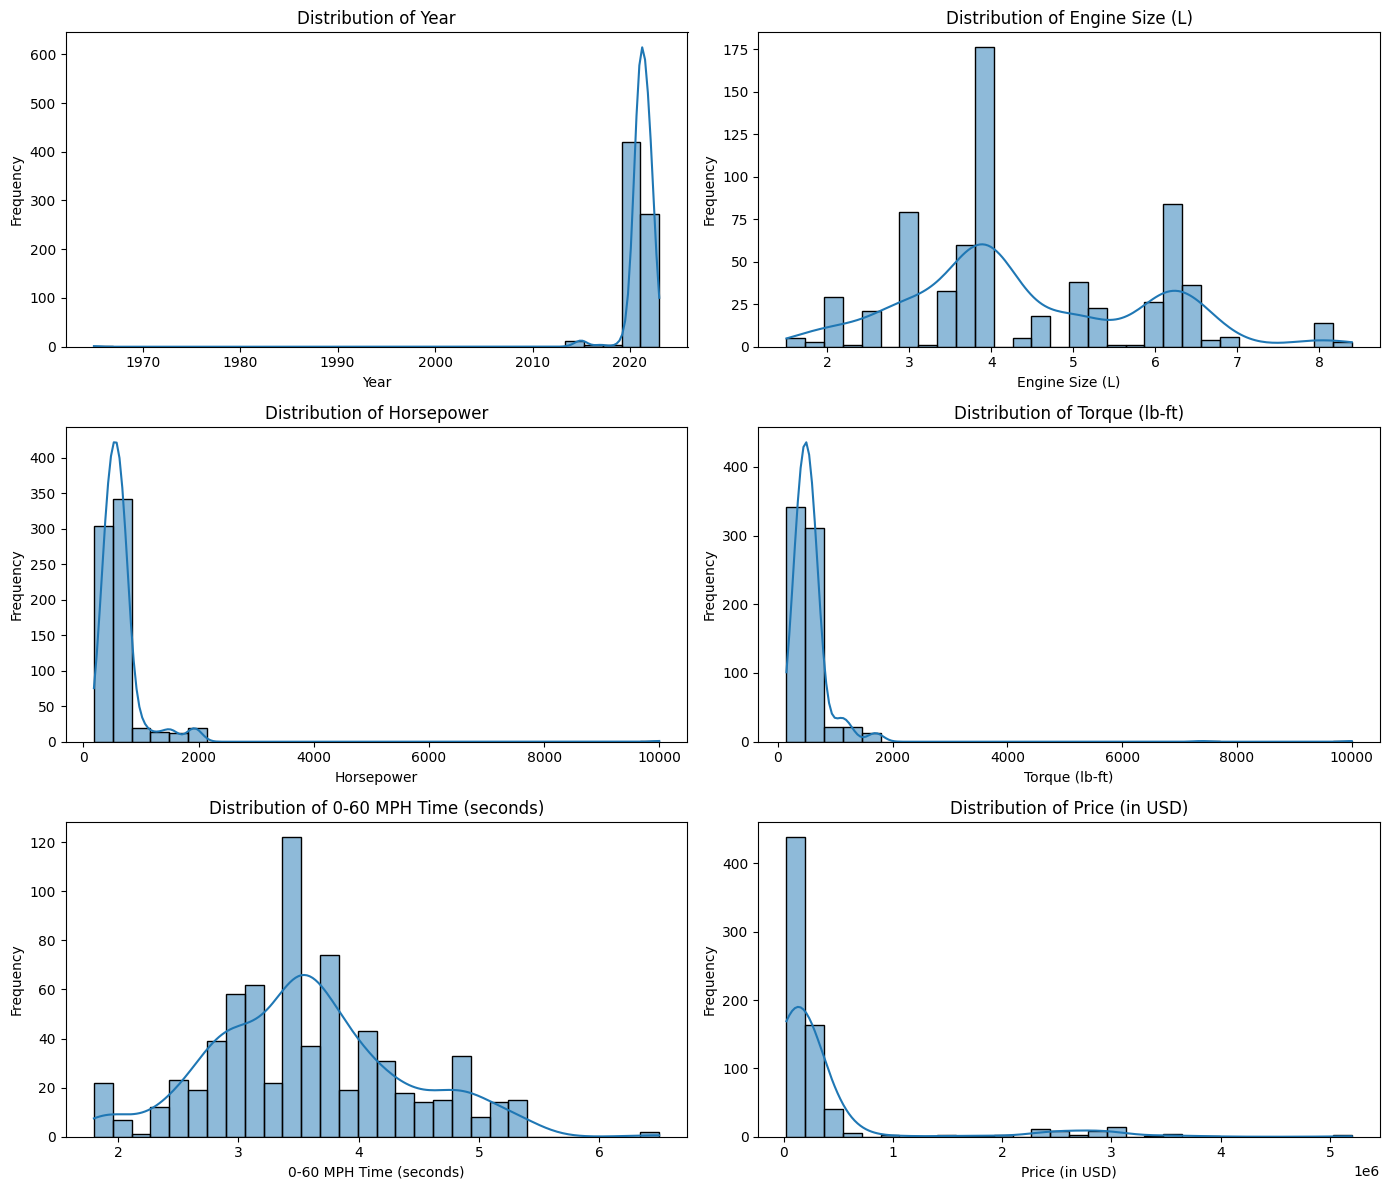

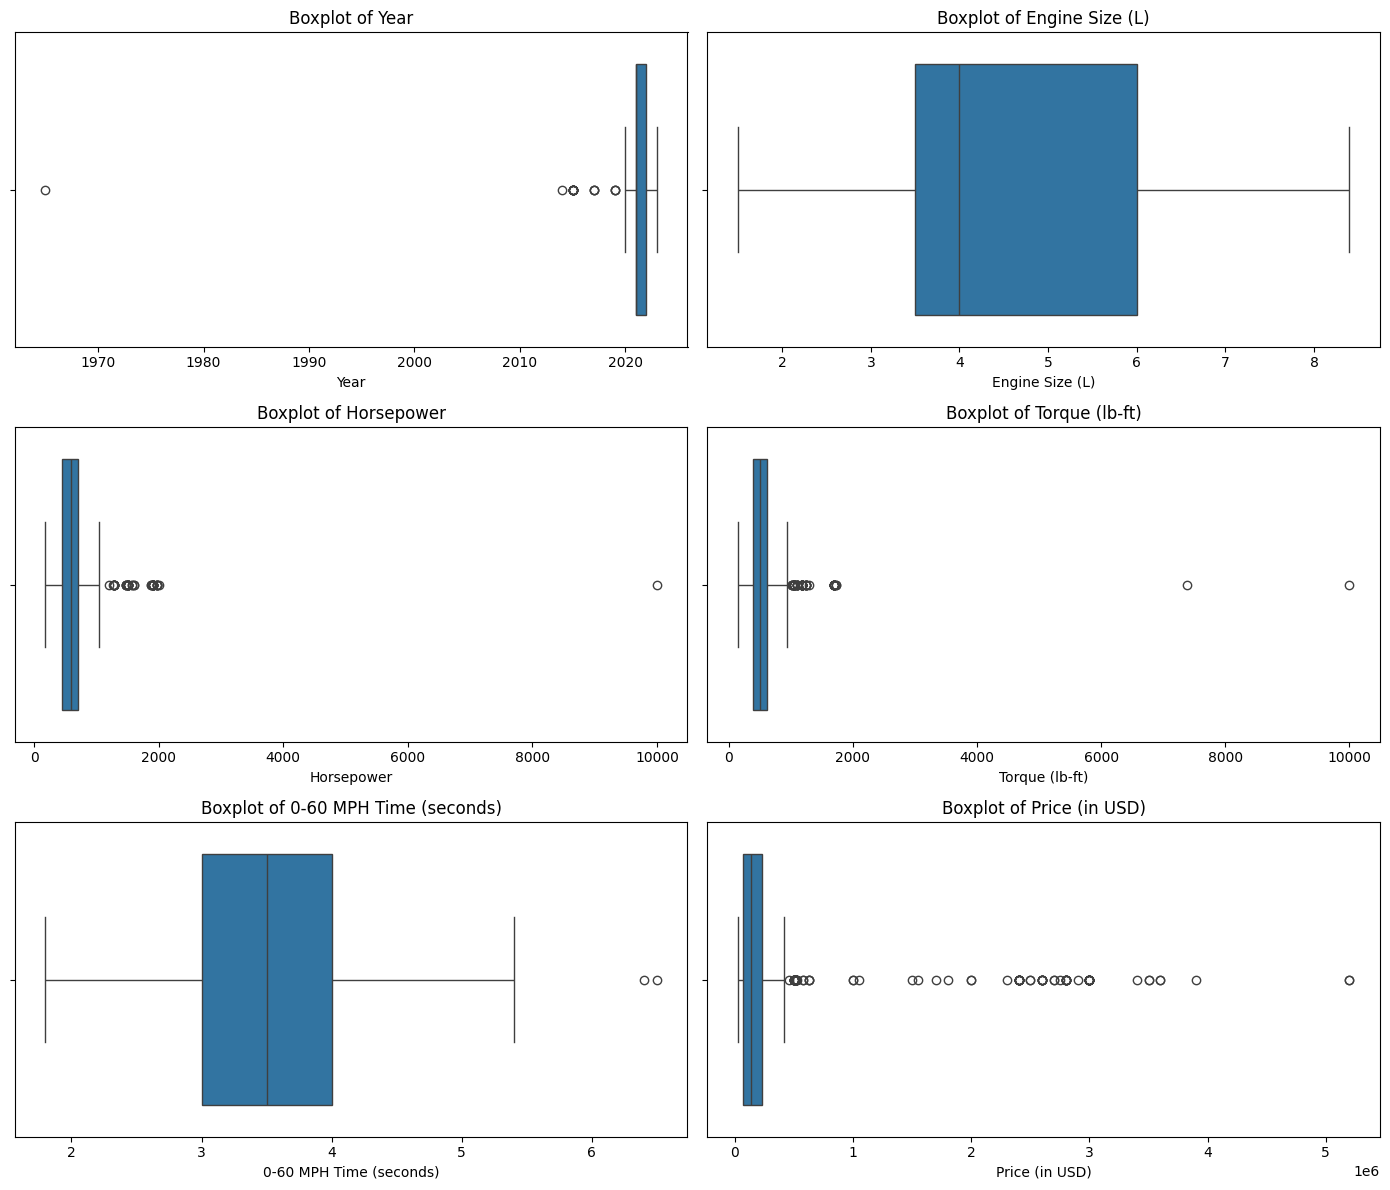

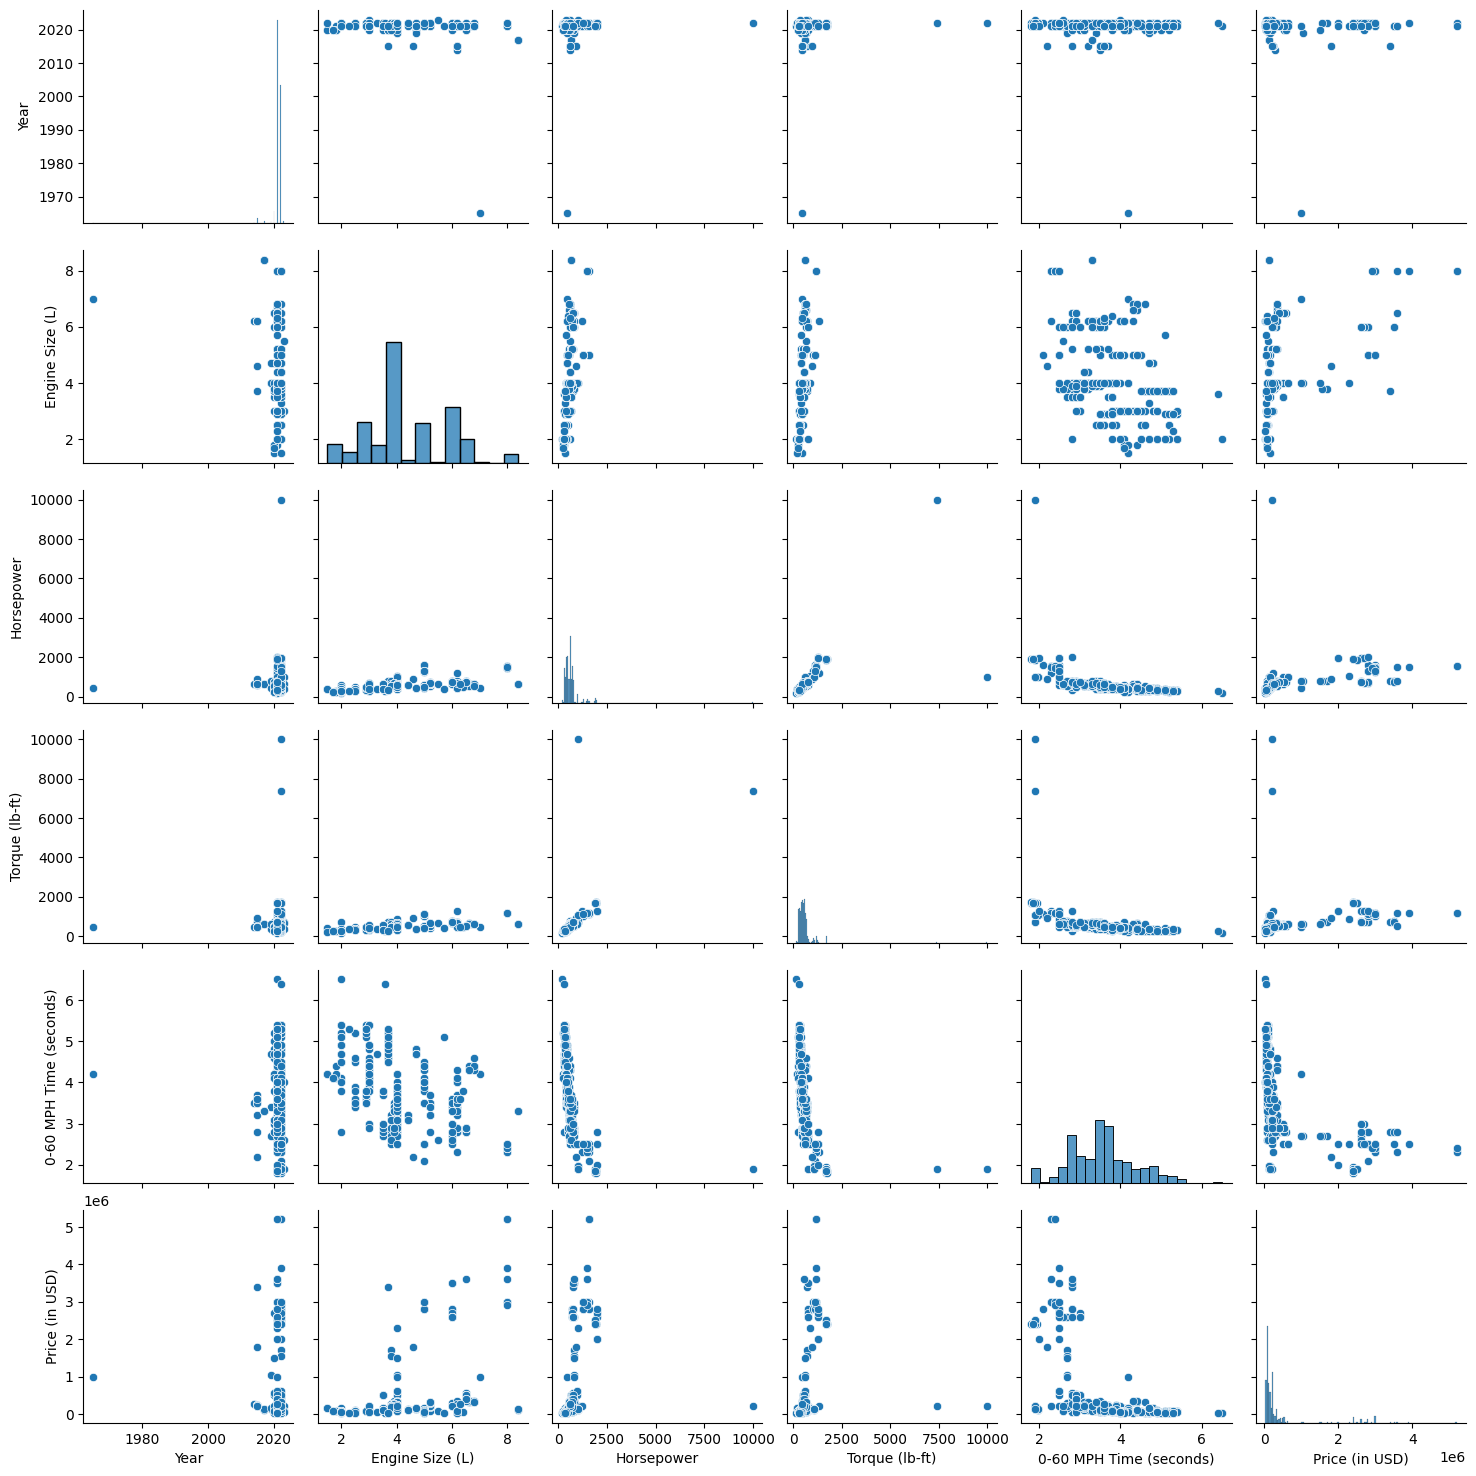

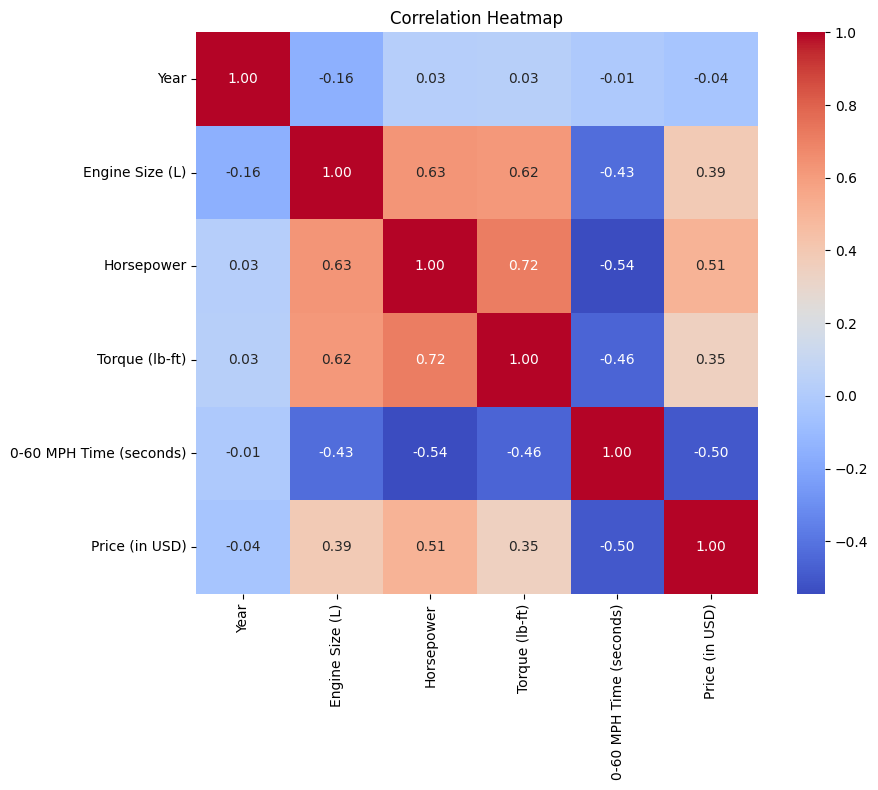

In [9]:
# Select numeric columns for plotting distributions
numeric_cols = df2.select_dtypes(include=['number']).columns.tolist()

# Plot distributions of numeric columns
plot_numeric_distributions(df2, numeric_cols)

# Plot boxplots for numeric columns
plot_numeric_boxplots(df2, numeric_cols)

# Plot pairplot of numeric columns
sns.pairplot(df2)
plt.show()

# Plot correlation heatmap of numeric columns
plot_correlation_heatmap(df2)

This section deals with outliers in the dataset. By inspecting the boxplots and pairplots generated in the previous step, it becomes clear that two values in the 'Horsepower' and 'Torque (lb-ft)' columns—specifically for the 'Roadster' model are extreme and inconsistent. These are identified as noise outliers rather than structural outliers. Based on domain knowledge and by comparing with other 'Roadster' entries in the dataset, the extreme values for 'Horsepower' and 'Torque (lb-ft)' are corrected. After making these corrections, it is evident that the considered rows are now duplicates of existing entries, so they are removed to ensure data quality and avoid redundancy.
Moreover, it has been observed to slightly improve the performance of machine learning models.

Additionally, the 'Year' column contains a significant outlier (the 1965 Shelby), which stands apart from the rest of the dataset, as all other cars are from 2014 or later. This entry is removed to maintain consistency.

Other outliers, such as those corresponding to very expensive cars, are considered structural outliers that reflect genuine variation in the data. These values are not corrected or removed, as they represent real-world cases. Instead, their impact will be managed by exploiting decision-tree-based models, which are generally more robust to outliers compared to linear regression.

In [10]:
# Show top 2 cars with highest Torque (lb-ft) to inspect extreme values
print("Showing top 2 cars outliers sorted by Torque (lb-ft) in descending order:")
display(df2.sort_values('Torque (lb-ft)', ascending=False).head(2))
# Inspect all 'Roadster' entries to compare noise outliers in 'Horsepower' and 'Torque (lb-ft)' with other Roadster entries
print("\nDisplaying all cars with model 'Roadster' to observe outlier values:")
display(df2[df2['Car Model'] == 'Roadster'])
# Correct noise outliers for 'Roadster' model
df2.loc[df2['Car Model'] == 'Roadster', 'Horsepower'] = 1000
df2.loc[df2['Car Model'] == 'Roadster', 'Torque (lb-ft)'] = 737.0
# Show all 'Roadster' rows including the corrected values
print("Displaying corrected 'Roadster' rows:")
display(df2[df2['Car Model'] == 'Roadster'])
# Remove duplicate rows created after correction
remove_duplicates(df2)

# Remove the 1965 Shelby as a year outlier 
df2 = df2[df2['Car Make'] != 'Shelby']
# Show dataset shape after removing outliers and duplicates
print(f"\nDataset shape after dropping Shelby row: {df2.shape[0]} rows, {df2.shape[1]} columns")

Showing top 2 cars outliers sorted by Torque (lb-ft) in descending order:


,Car Make,Car Model,Year,Engine Size (L),Horsepower,Torque (lb-ft),0-60 MPH Time (seconds),Price (in USD),Engine Type
354,Tesla,Roadster,2022,NaN,1000,10000.0,1.9,200000,Electric
885,Tesla,Roadster,2022,NaN,10000,7376.0,1.9,200000,Electric



Displaying all cars with model 'Roadster' to observe outlier values:


,Car Make,Car Model,Year,Engine Size (L),Horsepower,Torque (lb-ft),0-60 MPH Time (seconds),Price (in USD),Engine Type
99,Tesla,Roadster,2022,NaN,1000,737.0,1.9,200000,Electric
354,Tesla,Roadster,2022,NaN,1000,10000.0,1.9,200000,Electric
364,Tesla,Roadster,2023,NaN,1000,737.0,1.9,200000,Electric
885,Tesla,Roadster,2022,NaN,10000,7376.0,1.9,200000,Electric


Displaying corrected 'Roadster' rows:


,Car Make,Car Model,Year,Engine Size (L),Horsepower,Torque (lb-ft),0-60 MPH Time (seconds),Price (in USD),Engine Type
99,Tesla,Roadster,2022,NaN,1000,737.0,1.9,200000,Electric
354,Tesla,Roadster,2022,NaN,1000,737.0,1.9,200000,Electric
364,Tesla,Roadster,2023,NaN,1000,737.0,1.9,200000,Electric
885,Tesla,Roadster,2022,NaN,1000,737.0,1.9,200000,Electric


Number of duplicate rows: 2
Duplicates dropped. New shape: 708 rows, 9 columns

Dataset shape after dropping Shelby row: 707 rows, 9 columns


# Feature Engineering

This section applies power transformations to continuous numeric features that show skewed distributions, as identified in the previous distribution plots. Specifically, the features 'Horsepower', 'Torque (lb-ft)', and 'Price (in USD)' are transformed, since these variables exhibit significant skewness. Power transformations (such as Yeo-Johnson) are particularly beneficial for linear regression models because they help stabilize variance and make distributions more Gaussian. In this case, they are also useful for tree-based algorithms, as they can help reduce the influence of outliers and improve model performance.

In [11]:
# Identify continuous numeric features with skewed distributions to transform
skewed_features = ['Horsepower', 'Torque (lb-ft)', 'Price (in USD)']
# Initialize the power transformer 
pt = PowerTransformer(method='yeo-johnson')
# Create a copy of the DataFrame to apply transformations
df3 = df2.copy()
# Apply the power transformation to the selected features to reduce skewness and the effect of outliers
df3[skewed_features] = pt.fit_transform(df2[skewed_features])

# Let's consider a transformation specific only to the target variable 'Price (in USD)'
# So that then it's possible to apply the inverse transformation to get the original scale of Price (in USD) column
y = df2['Price (in USD)']
# Initialize the power transformer for the target variable
pt_target = PowerTransformer(method='yeo-johnson')
# Fit and transform the target variable
y = pt_target.fit_transform(y.values.reshape(-1, 1)).ravel()

In this section, the distributions, pairplots, and correlation heatmap are displayed again to visualize the effects of preprocessing and feature engineering. Notably, the features 'Horsepower', 'Torque (lb-ft)', and 'Price (in USD)' now exhibit distributions that are closer to normal, thanks to the applied power transformations. Additionally, it's also more evident the linear relationship between 'Horsepower', 'Torque (lb-ft)', '0-60 MPH Time (seconds)' and 'Price (in USD)' in scatterplots and correlation heatmap. 

Additionally, it's possible to note an high correlation of 0.93 between 'Horsepower' and 'Torque (lb-ft)' features, but dropping one of the two doesn't lead to performance improvements, so they are both considered for prediction.
The feature correlation analysis shows that 'Year' has the lowest correlation with price at -0.13, followed by 'Engine Size' at 0.38, while all other features have correlations above 0.65 with the target variable. In addition, the categorical features 'Car Make', 'Car Model', and 'Engine Type' appear to be quite important for predicting price. Given these observations, it is reasonable to retain all features, both numerical and categorical, in the modeling process to ensure that the model can leverage all relevant information. Furthermore, this conclusion is reinforced by additional attempts to improve performance, which did not yield better results.

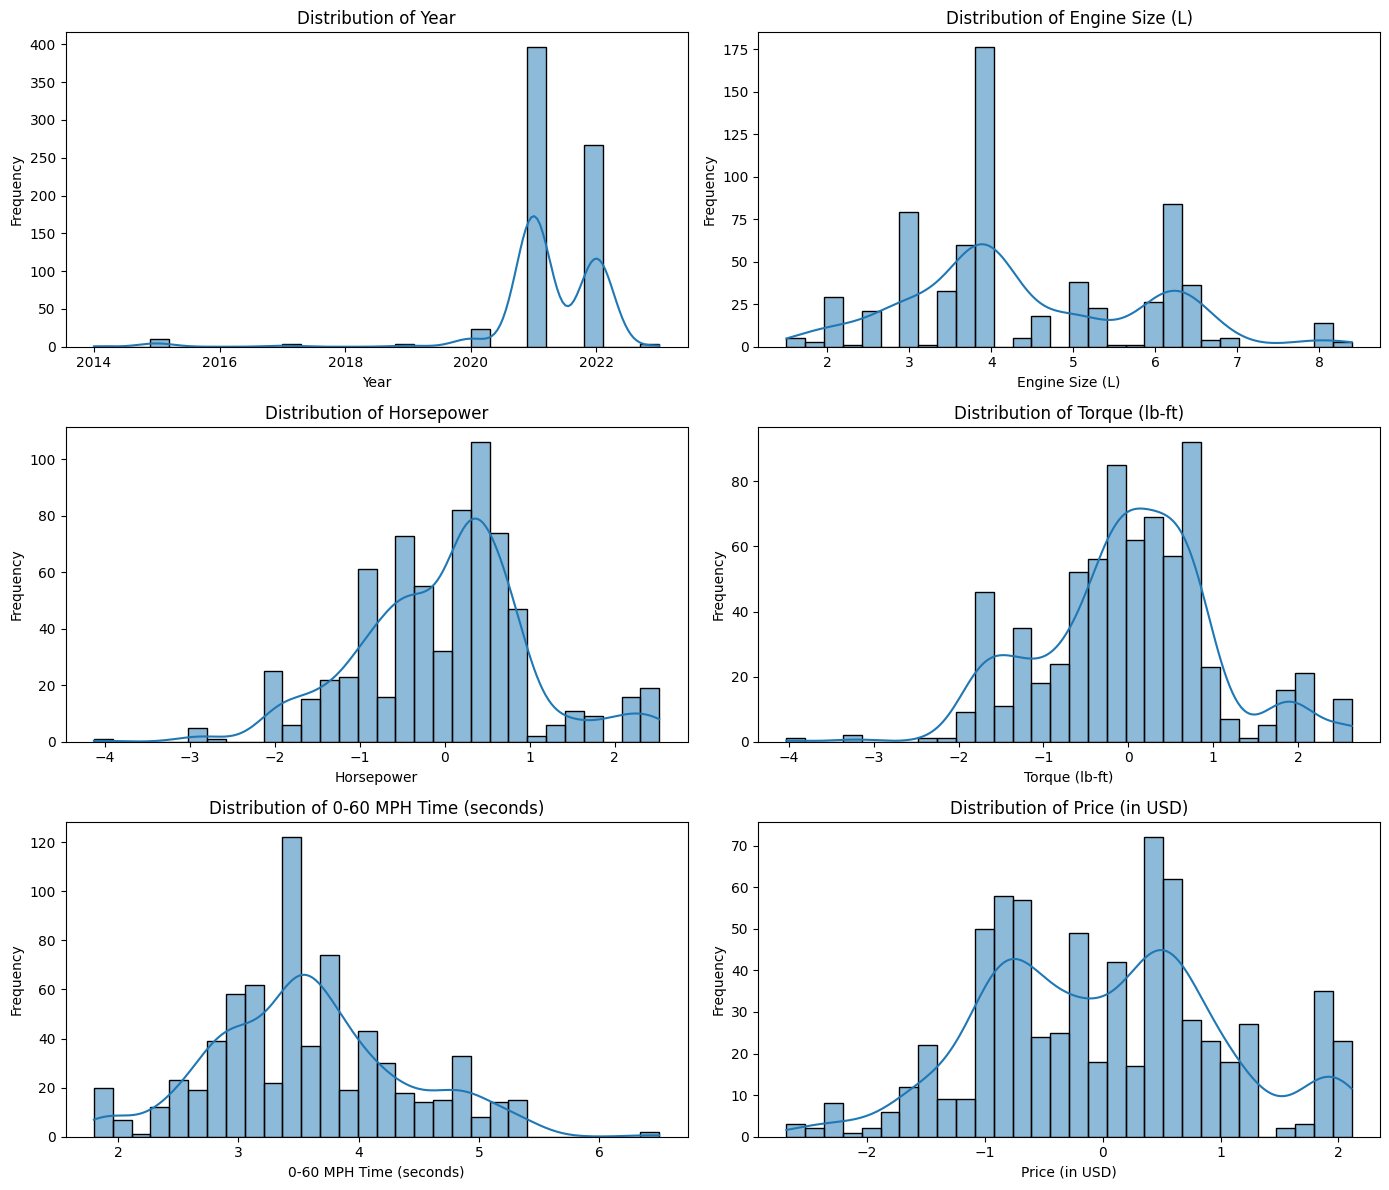

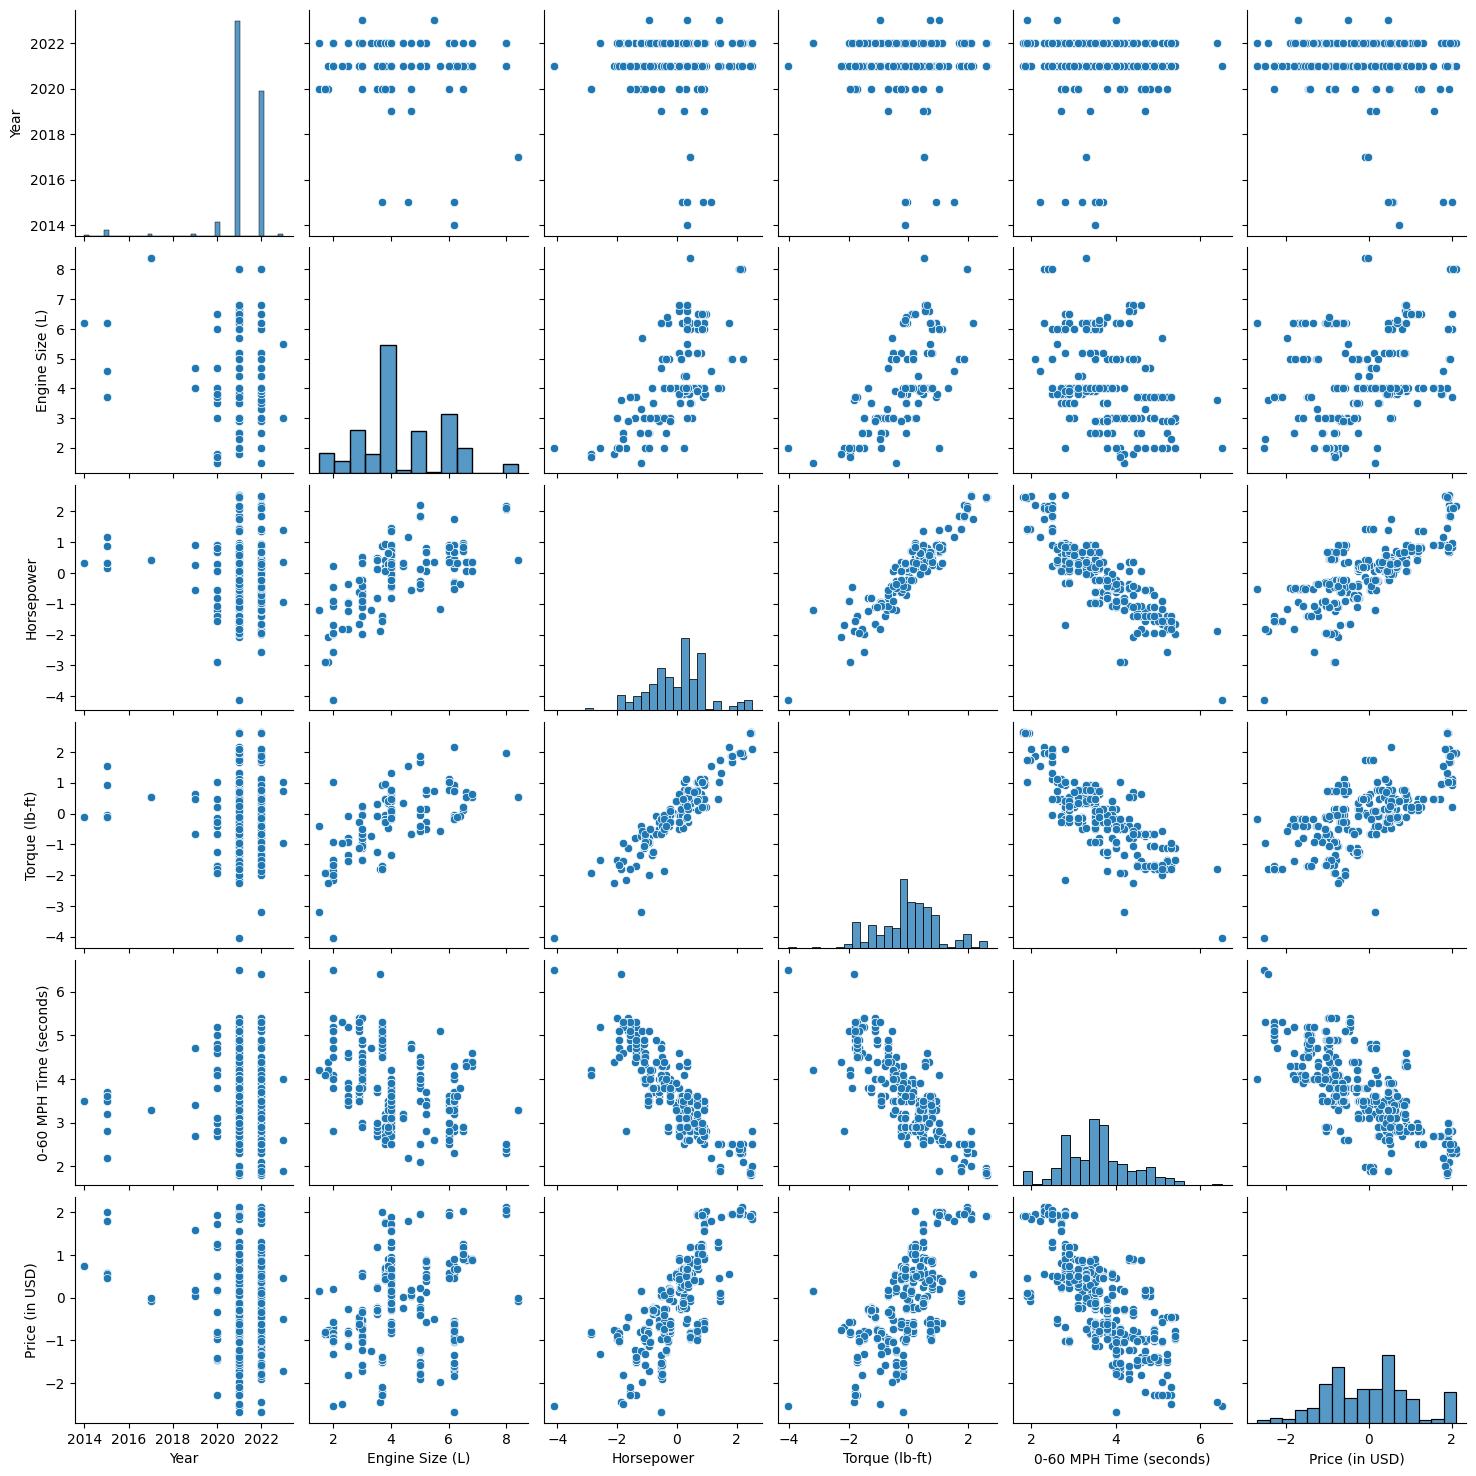

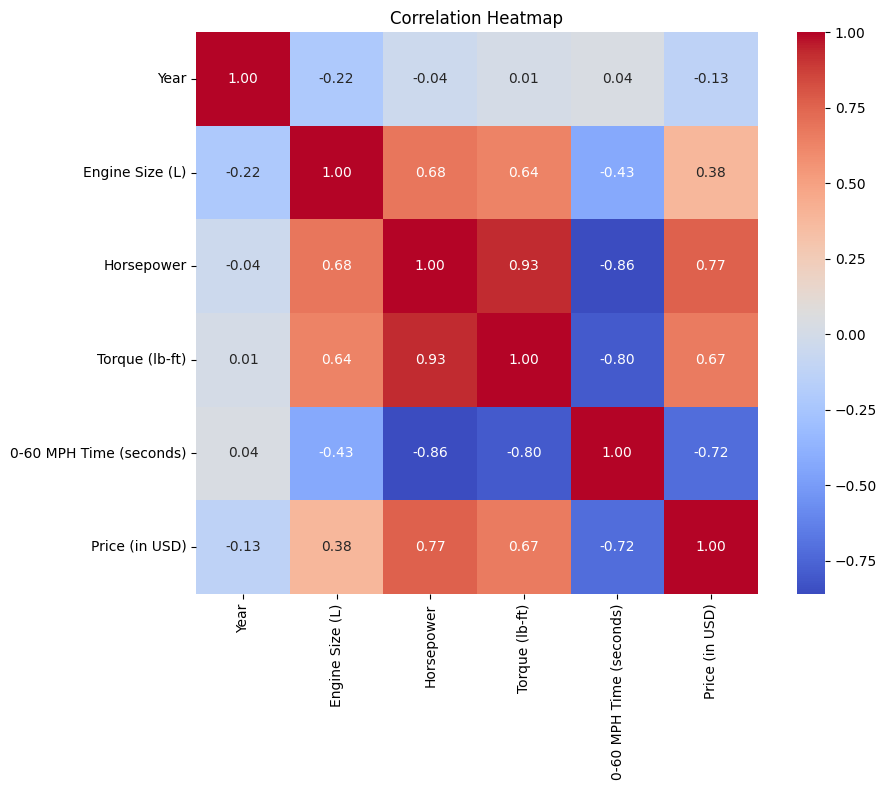

In [12]:
# Plot distributions of numeric columns
plot_numeric_distributions(df3, numeric_cols)

# Plot pairplot of numeric columns
sns.pairplot(df3)
plt.show()

# Plot correlation heatmap of numeric columns
plot_correlation_heatmap(df3)

This section encodes the categorical columns 'Car Make', 'Car Model', and 'Engine Type' using label encoding. Converting categorical variables into numeric format is necessary for most machine learning algorithms, which require numerical input. Label encoding assigns a unique integer to each category in the selected columns, making the data suitable for model training.

Additionally, a separate dataset is prepared for linear regression by filling missing values with 0. This allows for a fair comparison between linear regression and tree-based models, as linear regression cannot natively handle missing values.

In [13]:
# Encoding categorical columns
categorical_cols = ['Car Make', 'Car Model', 'Engine Type']
df_encode = label_encode_columns(df3, categorical_cols)
# Show the unique values in each categorical column after encoding
print("\nUnique values in each categorical column after encoding:")
for col in categorical_cols:
    print(f"\nUnique values in '{col}':")
    print(df_encode[col].dropna().unique())

# Create a copy of the DataFrame for comparison of Tree-based models with linear regression
df_linr = df_encode.copy()
# Fill NaN values with 0 for linear regression
df_linr.fillna(0, inplace=True)  


Unique values in each categorical column after encoding:

Unique values in 'Car Make':
[28 16 11  5 21  6 23  9 12 24  4  8 10 13 15 17 18 19  1  3  7 22 25 27
 29  0 20 30 33 34 36 32 31 26 14  2 35]

Unique values in 'Car Model':
[ 18  97   5 129  15 111  27  69 119  89  72  64  59  78  98 101  77  92
  38  91  33  67  32 154  94   0 121  54  36 150 144 106  52  85   3 164
 166 147 139 174  46  53   8  26  49 117 167 122 148  10 109 140 103  60
  34  42   1 161  70  81 118  13 120 113  14 171 146 160  83 152  73 126
 127 125 172 132 104 168  47 115  84  93 102 135 163  23 136  41 137  35
 105 149 165  17 130  31  79   6  63 170 124 134 155  96  37 159 114  16
  57  76  56 100  95  21  40 133 169 145 107  62  99  75  30  11  50 158
 157 153  12  80   7 141  45 162 108 131  82  66 156 138  24  71  29 128
 151  48  74  65  88   4 142  86  20  68  55  19 110 143 173  51   2  87
   9  39  58  44  25  22  90  61 123  28  43 112 116]

Unique values in 'Engine Type':
[0 1 2]


#  Model Development for Price Prediction

This code section covers the full machine learning workflow for regression model selection and tuning, following these main steps:

### 1. Extract Features Variable
- The feature matrix `X` is created by dropping the target column `'Price (in USD)'` from the encoded DataFrame.
- The target variable `y` is set as the `'Price (in USD)'` column.

### 2. 70/15/15 Dataset Split
- The dataset is split into training (70%), validation (15%), and test (15%) sets using `train_test_split`.

### 3. Define Tree-based Models and Linear Regression
- Four tree-based regression models are defined: `HistGradientBoostingRegressor`, `RandomForestRegressor`, `XGBRegressor`, and `CatBoostRegressor`.
- Linear Regression is also prepared using a separate DataFrame (`df_linr`).

### 4. Model Selection
- Each tree-based model is trained on the training set and evaluated on the validation set.
- R², MSE, and MAE metrics are calculated and printed for each model.
- Linear Regression was trained and evaluated using the same workflow as the tree-based models. However, its performance was notably lower, achieving an R² score of only **0.591** on the validation set. In contrast, all tree-based models achieved R² scores above **0.8**, with CatBoost reaching **0.932**. This highlights the superior ability of tree-based models to capture complex, nonlinear relationships in the data, whereas linear regression struggled to model the underlying patterns effectively.
- The best model is selected based on the highest R² score on the validation set.

### 5. Hyperparameter Tuning for Best Model
- A parameter grid is defined for each tree-based model.
- The training and validation sets are combined for tuning.
- `RandomizedSearchCV` is used to search for the best hyperparameters for the selected model using 5-fold cross-validation.

This workflow ensures robust model selection and tuning for the regression task.

According to the results obtained with `random_state=42`, the best model selected was CatBoost, achieving a validation R² score of 0.932. During hyperparameter tuning, the optimal parameters found for CatBoost were: `learning_rate=0.2`, `iterations=300`, and `depth=5`. These results are specific to the random seed used, ensuring reproducibility of the model selection and tuning.

In [14]:
# Extract features variable
X = df_encode.drop(columns=['Price (in USD)'])

# 70/15/15 Dataset split 
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.15,
    random_state=42
)
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train,
    test_size=0.1765,  
    random_state=42
)

# Display the shape of the training, validation, and test sets
print("Data Splits for 707 Samples:")
print(f"- Train: {X_train.shape[0]} samples (70%)")
print(f"- Validation: {X_val.shape[0]} samples (15%)")
print(f"- Test: {X_test.shape[0]} samples (15%)\n")

# Prepare features and target variable for Linear Regression 
X_linr = df_linr.drop(columns=['Price (in USD)'])
y_linr = df_linr['Price (in USD)']

# 70/15/15 split for Linear Regression dataset
X_linr_train, X_linr_test, y_linr_train, y_linr_test = train_test_split(
    X_linr, y_linr,
    test_size=0.15,
    random_state=42
)

X_linr_train, X_linr_val, y_linr_train, y_linr_val = train_test_split(
    X_linr_train, y_linr_train,
    test_size=0.1765, 
    random_state=42
)

# Define Tree-based models 
models = {
    'HistGradientBoosting': HistGradientBoostingRegressor(random_state=42),
    'RandomForest': RandomForestRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42, enable_categorical=True),
    'CatBoost': CatBoostRegressor(verbose=0, random_state=42)
}

# Model selection 
print("=== Model Selection ===")
print("{:<25} {:<10} {:<10} {:<10}".format("Model", "R2", "MSE", "MAE"))
print("-" * 50)

val_results = {}

# Train and evaluate Tree-based models 
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_val)
    
    # Store validation results
    val_results[name] = {
        'model': model,
        'R2': r2_score(y_val, preds),
        'MSE': mean_squared_error(y_val, preds),
        'MAE': mean_absolute_error(y_val, preds)
    }
    print("{:<25} {:<10.3f} {:<10.2f} {:<10.2f}".format(
        name, val_results[name]['R2'], val_results[name]['MSE'], val_results[name]['MAE']
    ))

# Train and evaluate Linear Regression 
linr_model = LinearRegression()
linr_model.fit(X_linr_train, y_linr_train)
linr_preds = linr_model.predict(X_linr_val)
val_results['LinearRegression'] = {
    'model': linr_model,
    'R2': r2_score(y_linr_val, linr_preds),
    'MSE': mean_squared_error(y_linr_val, linr_preds),
    'MAE': mean_absolute_error(y_linr_val, linr_preds)
}
print("{:<25} {:<10.3f} {:<10.2f} {:<10.2f}".format(
    'LinearRegression',
    val_results['LinearRegression']['R2'],
    val_results['LinearRegression']['MSE'],
    val_results['LinearRegression']['MAE']
))

# Choose the best model 
best_model_name = max(
    (k for k in val_results if k != 'LinearRegression'),
    key=lambda k: val_results[k]['R2']
)
print(f"\nBest model: {best_model_name} (Val R2: {val_results[best_model_name]['R2']:.3f})")

# Hyperparameter tuning for best model 
print("\n=== Hyperparameter Tuning ===")
# Define parameter grids for each model
param_grids = {
    'HistGradientBoosting': {
        'learning_rate': [0.05, 0.075, 0.1, 0.125, 0.15],
        'max_iter': [100, 150, 200, 250],
        'max_leaf_nodes': [15, 25, 31, 40],
        'min_samples_leaf': [5, 10, 15, 20]
    },
    'RandomForest': {
        'n_estimators': [100, 150, 200, 250],
        'max_depth': [10, 15, 20, 25],
        'min_samples_split': [2, 4, 6, 8, 10]
    },
    'XGBoost': {
        'n_estimators': [100, 125, 150, 175],
        'max_depth': [4, 5, 6, 7],
        'learning_rate': [0.1, 0.15, 0.2, 0.25, 0.3],
        'subsample': [0.8, 0.85, 0.9, 0.95]
    },
    'CatBoost': {
        'learning_rate': [0.1, 0.15, 0.2, 0.25, 0.3],
        'iterations': [250, 300, 350, 400],
        'depth': [3, 4, 5, 6]
    }
}

# Hyperparameter tuning for best model
if best_model_name in param_grids:
    # Combine train + val for tuning
    X_trainval = pd.concat([X_train, X_val])
    y_train_series = pd.Series(y_train)
    y_val_series = pd.Series(y_val)
    y_trainval = pd.concat([y_train_series, y_val_series])

    # Perform Randomized Search CV for the best model
    search = RandomizedSearchCV(
        val_results[best_model_name]['model'],
        param_grids[best_model_name],
        n_iter=30,
        cv=5,
        scoring='r2',
        random_state=42,
        n_jobs=-1
    )
    search.fit(X_trainval, y_trainval)
    best_model = search.best_estimator_
    print(f"Best params: {search.best_params_}")

Data Splits for 707 Samples:
- Train: 494 samples (70%)
- Validation: 106 samples (15%)
- Test: 107 samples (15%)

=== Model Selection ===
Model                     R2         MSE        MAE       
--------------------------------------------------
HistGradientBoosting      0.921      0.09       0.15      
RandomForest              0.905      0.11       0.15      
XGBoost                   0.894      0.12       0.14      
CatBoost                  0.932      0.08       0.12      
LinearRegression          0.591      0.46       0.51      

Best model: CatBoost (Val R2: 0.932)

=== Hyperparameter Tuning ===
Best params: {'learning_rate': 0.2, 'iterations': 300, 'depth': 5}


# Model Prediction and Evaluation

This code section evaluates and compares the performance of the default and tuned versions of the best regression model on the test set, using the original price values for meaningful interpretation. It begins by training the default model (with its original hyperparameters) on the combined training and validation data. Both the default and tuned models then make predictions on the test set, but these predictions are initially in the transformed scale due to the earlier normalization of the target variable.

To ensure the results are interpretable, the code applies the inverse transformation to both the predicted and actual test values, restoring them to their original price scale. It then calculates key regression metrics—R², mean squared error (MSE), and mean absolute error (MAE)—for both models and prints them in a formatted table. Finally, the code computes and displays the percentage improvement in R² achieved through hyperparameter tuning, clearly demonstrating the impact of model optimization on predictive performance.

With`random_state=42` set throughout the workflow, the tuned CatBoost model achieved an R² score of 0.909 on the test set, compared to 0.850 for the default model. This represents a 6.9% increase in R², along with a reduction in mean squared error (MSE) from approximately 111,449,492,212 to 67,876,712,481 and a decrease in mean absolute error (MAE) from about $67,689 to $58,056. These results indicate a substantial improvement in predictive accuracy after hyperparameter tuning. An R² of 0.909 suggests that the tuned model explains over 90% of the variance in the target variable, which is considered very good performance for a regression task.



In [15]:
print("\n=== Performance Comparison on Test Set (Original Price Scale) ===")
print(f"{'Model':<30} {'R2':>8} {'MSE':>20} {'MAE':>15}")
print("-" * 75)

# Train default model on transformed target (train+val)
default_model_full = clone(models[best_model_name]).fit(X_trainval, y_trainval)

# Predict on test set (transformed scale)
default_preds_trans = default_model_full.predict(X_test)
tuned_preds_trans = best_model.predict(X_test)

# Inverse-transform predictions back to original price scale
default_preds_orig = pt_target.inverse_transform(default_preds_trans.reshape(-1, 1)).ravel()
tuned_preds_orig = pt_target.inverse_transform(tuned_preds_trans.reshape(-1, 1)).ravel()

# Inverse-transform y_test to original price scale
y_test_orig = pt_target.inverse_transform(y_test.reshape(-1, 1)).ravel()

# Evaluate models on original scale
print(f"{best_model_name + ' (Default)':<30} "
      f"{r2_score(y_test_orig, default_preds_orig):8.3f} "
      f"{mean_squared_error(y_test_orig, default_preds_orig):20.2f} "
      f"{mean_absolute_error(y_test_orig, default_preds_orig):15.2f}")

print(f"{best_model_name + ' (Tuned)':<30} "
      f"{r2_score(y_test_orig, tuned_preds_orig):8.3f} "
      f"{mean_squared_error(y_test_orig, tuned_preds_orig):20.2f} "
      f"{mean_absolute_error(y_test_orig, tuned_preds_orig):15.2f}")

# Improvement calculation from default to tuned model
improvement = (r2_score(y_test_orig, tuned_preds_orig) - r2_score(y_test_orig, default_preds_orig)) / r2_score(y_test_orig, default_preds_orig) * 100
print(f"\nImprovement from tuning: {improvement:.1f}% R2 increase")


=== Performance Comparison on Test Set (Original Price Scale) ===
Model                                R2                  MSE             MAE
---------------------------------------------------------------------------
CatBoost (Default)                0.850      111449491799.17        67689.19
CatBoost (Tuned)                  0.908       68504245055.75        58007.91

Improvement from tuning: 6.8% R2 increase


This code section generates regression evaluation plots for the tuned version of the best model. By calling the `regression_evaluation_plots` function with the original test target values, the tuned model's predictions (both on the original price scale), and the best model's name, it visualizes the model's predictive performance. These plots include residual plots and scatter plots of predicted vs. actual values, providing a comprehensive visual assessment of how well the tuned model fits the test data.

**Residuals vs True Values:**

The majority of residuals are concentrated around zero, indicating that the model provides accurate predictions for most price ranges. This tight clustering suggests strong overall model performance. However, there are some noticeable outliers characterized by larger residuals at higher true price values. This pattern implies that the model tends to be less precise for the most expensive cars, because such high-value cases are underrepresented in the dataset.

**Predicted vs True Values:**

Most points lie close to the diagonal (red dashed) line, which represents perfect predictions, demonstrating that the model's predictions closely match the actual values for the majority of cases. There is a slight increase in deviation from the line at the highest price levels, further supporting the observation that the model struggles more with extreme values. 

Overall, these plots demonstrate that the tuned CatBoost model delivers strong predictive accuracy for most vehicles, particularly within the common price ranges. The model's performance remains robust throughout the dataset, though it exhibits some difficulty in precisely estimating prices for the most expensive, less frequent cars in the Dataset.

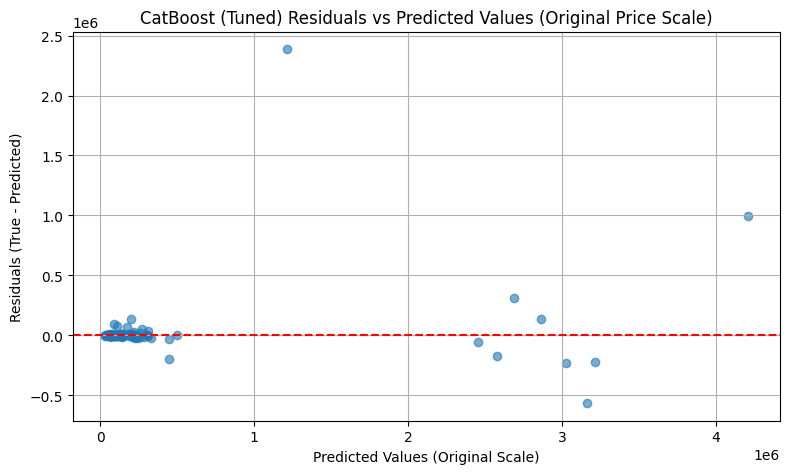

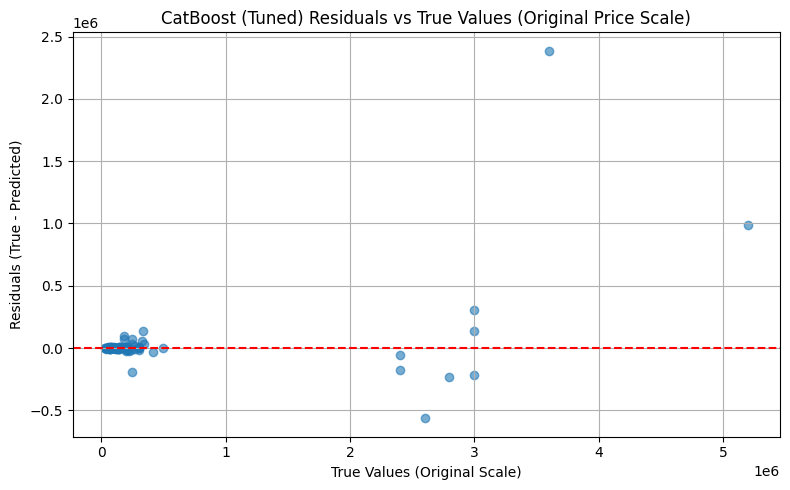

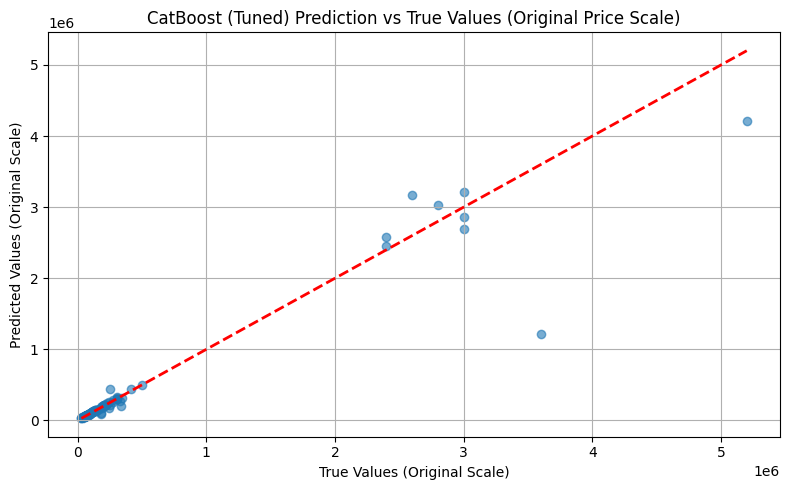

In [16]:
# Plot regression evaluation for tuned model
regression_evaluation_plots(y_test_orig, tuned_preds_orig, best_model_name + ' (Tuned)')
# Plot regression evaluation with a zoomed-in view of standard price range (not including extreme outliers)
zoomed_in_view = False  # Set to True to enable zoomed-in view
if zoomed_in_view:
    regression_evaluation_plots(
        y_test_orig, tuned_preds_orig, best_model_name + ' (Tuned)',
        residuals_vs_pred_xlim=(0, 500000),
        residuals_vs_pred_ylim=(-100000, 100000),
        residuals_vs_true_xlim=(0, 500000),
        residuals_vs_true_ylim=(-100000, 100000),
        pred_vs_true_xlim=(0, 500000),
        pred_vs_true_ylim=(0, 500000)
    )

# Conclusion and Recommendations

### Project Summary

This project successfully developed a robust machine learning pipeline to predict sports car prices using the `Sport_car_price.csv` dataset. The workflow encompassed thorough data cleaning, feature engineering, exploratory analysis, model selection, and evaluation, resulting in a high-performing predictive model. The main steps and outcomes are summarized below:

#### **Data Loading & Exploration**
- Loaded the dataset and performed an initial inspection of structure, data types, and sample records.
- Investigated unique values in `Engine Size (L)` and `Torque (lb-ft)` columns to identify non-numeric entries and placeholders.

#### **Data Cleaning and Preprocessing**
- Converted placeholder data (e.g., 'Electric', '-', '0') in `Engine Size (L)` and `Torque (lb-ft)` to a consistent format.
- Eliminated unwanted characters and standardized missing values as NaNs.
- Converted numeric string columns to numeric types for further analysis and modeling.
- Removed duplicate records and corrected noise outliers, particularly for the 'Roadster' and the 1965 Shelby, which was crucial for improving data quality and model performance.
- Managed missing values by retaining NaN for structurally missing data (e.g., electric cars’ engine sizes, handled natively by tree-based models) and dropping a few rows with missing values in `Torque (lb-ft)`.

#### **Exploratory Data Analysis (EDA)**
- Visualized feature distributions, boxplots, pairplots, and correlations to identify skewness, outliers, and relationships.
- Noted a strong correlation between `Horsepower` and `Torque (lb-ft)`, and a weaker correlation between `Year` and price.
- Identified and addressed skewed distributions in `Horsepower`, `Torque (lb-ft)`, and `Price (in USD)`.
- Recognized the presence of both noise outliers and structural outliers (very expensive cars), retaining the latter.

#### **Feature Engineering**
- Created a new categorical feature, `Engine Type`, to classify vehicles as 'Electric', 'Hybrid', or 'Combustion'.
- Applied power transformations (e.g., Yeo-Johnson) to continuous variables (`Horsepower`, `Torque (lb-ft)`, `Price (in USD)`) to reduce skewness and the effect of structural outliers, which improved model accuracy.
- Retained all features, as each contributed to model performance.

#### **Encoding & Modeling Preparation**
- Encoded categorical variables using label encoding.
- Prepared a separate imputed dataset for linear regression by filling NaNs with 0.

#### **Model Selection**
- Trained five regression models: four tree-based (CatBoost, XGBoost, Random Forest, HistGradientBoosting) and one linear regression for comparison.
- Linear regression performed poorly, with an R² of only **0.591**, highlighting its inability to capture complex, nonlinear relationships in the data.
- In contrast, all tree-based models achieved R² scores above **0.8**, with CatBoost achieving the best validation performance (R² = **0.932**).

#### **Hyperparameter Tuning**
- Optimized CatBoost using `RandomizedSearchCV`, tuning parameters such as `learning_rate`, `iterations`, and `depth`.
- The optimal parameters found for CatBoost were: `learning_rate=0.2`, `iterations=300`, and `depth=5`.

#### **Model Evaluation & Visualization**
- The tuned CatBoost model achieved an impressive test R² of 0.909 (up from 0.850), with lower MSE and MAE compared to the default model. This means the optimized model explains over 90% of the variance in car prices, delivering highly accurate predictions and demonstrating the strong impact of hyperparameter tuning on model performance.
- Generated regression evaluation plots:
  - **Residuals Plot:** Showed tight clustering around zero, with greater spread for high-priced cars.
  - **Predicted vs. True Plot:** Demonstrated strong alignment between predicted and actual prices, especially for common price ranges.

**Key Takeaways:**  
Removing duplicates and correcting outliers were essential for data quality. Reducing skewness via power transformations and using advanced tree-based models, especially CatBoost, were critical for achieving high predictive accuracy. Linear regression was insufficient for this task, reinforcing the importance of model selection based on data characteristics.

---

### Recommendations for Future Work

- **Expand Dataset:** Collect more data, particularly for high-priced vehicles, to improve model generalization for rare cases or consider data augmentation.
- **Advanced Feature Engineering:** Incorporate additional features and explore feature interactions.
- **Model Improvements:** Experiment with ensemble or stacking approaches to further enhance predictive performance or explore deep learning approaches.
- **Automated Pipelines:** Develop automated workflows for data preprocessing, feature engineering, and model selection to streamline future analyses.
- **Deployment:** Build an API or web interface for real-time predictions and implement monitoring for model drift.
- **Continuous Learning:** Periodically retrain the model with new data to maintain accuracy as the market evolves.

By following these recommendations, the project can be extended and adapted to deliver even greater value and reliability in real-world applications.